<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/article_size_per_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we calculate the mean and standard deviation of the articles length for each category
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- statistics
</font>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statistics 
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from statistics import stdev

<br>
<font size="4">After installing and importing everything we are going to need we will read our data from the output.csv file</font>
<br>
<br>

In [ ]:
df = pd.read_csv('output.csv')

<font size="3">First of all we will define the core functions for our project:
- **length_category:** this function takes as input a category name and returns it's average article length.
- **plot_barchart:** this function takes as input three lists x,y,z and plots a stacked bar chart
</font>

In [ ]:
def length_category(category):
    #group all articles by their topic
    culture_articles = df.groupby(['topic']).get_group(category)['article_body']

    #counter will be used to count the number of articles each category has
    counter = 0
    #sum_words will sum the length of all articles in order to 
    sum_words = 0
    #save each articles length in this empty list
    my_len = []
    for words in culture_articles:
        #if an article is empty just increase the counter
        if type(words) == float:
            counter += 1
        #if the article isn't empty increase the counter and add to sum the articles length
        else:
            word_list = words.split()
            article_length = len(word_list)
            #save the length to the list
            my_len.append(article_length)
            sum_words = sum_words + article_length
            counter += 1

    # devide the sum_words with the counter to find the mean length
    average_length = sum_words/counter
    return (average_length,my_len)

#this function gets as input the average length for each topic, and the topics name and
#plots the bar chart of each category  
def plot_barchart(average,len_articles,categories):
    N = 10
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(20, 15))
    p1 = plt.bar(ind,average, width,color=('orange'))
    p2 = plt.bar(ind, len_articles, width,
                 bottom=average,color=('powderblue'))
    
    plt.ylabel('Word Count',fontsize=15)
    plt.title('Mean length and Standard Deviation of articles grouped by category',fontsize=15)
    plt.xticks(ind, categories,fontsize=15)
    plt.yticks(np.arange(0, 500, 20),fontsize=15)
    plt.legend((p1[0], p2[0]), ('Mean', 'Standard Deviation'),fontsize=15)
    plt.grid(axis='y')

    plt.show()

<font size="3">The main code:</font>

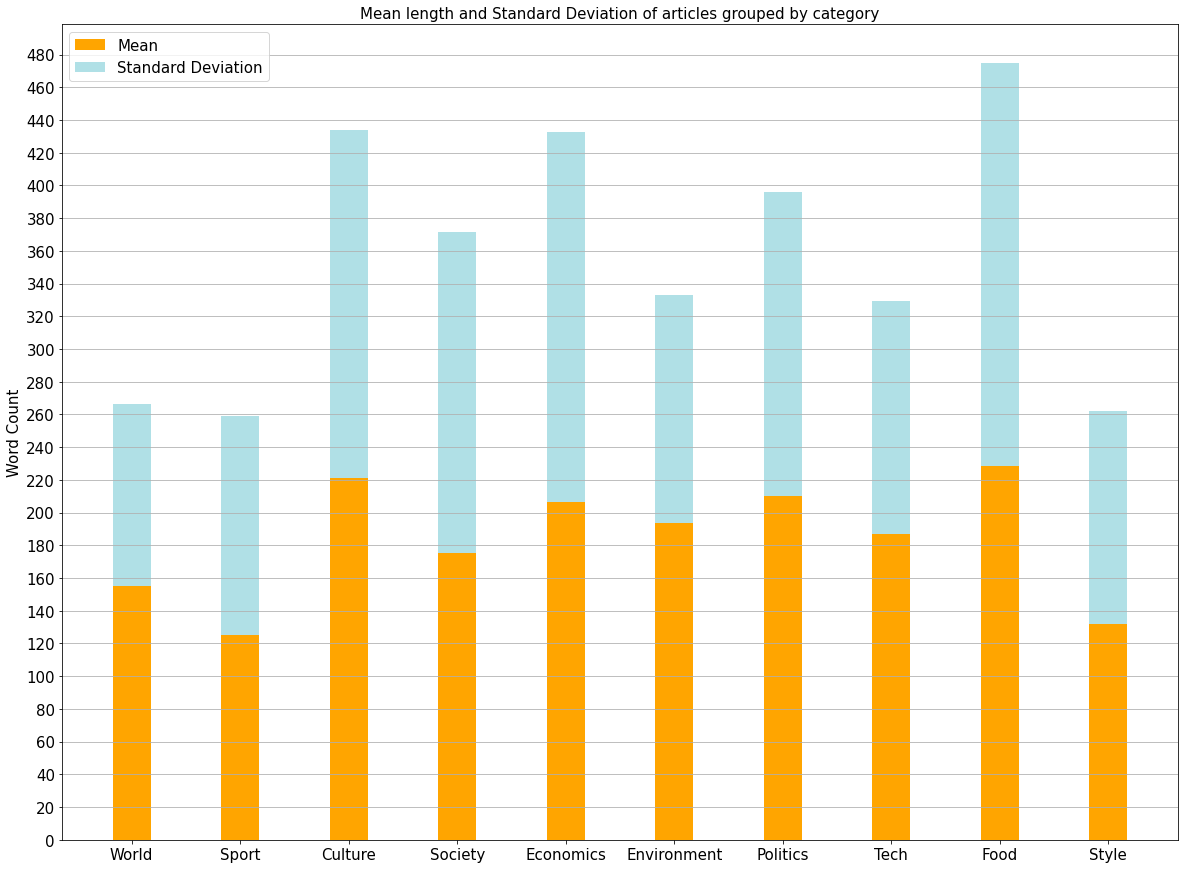

In [ ]:
#List unique values in the df['topic'] column
categories = list(df.topic.unique())
#list with the average length
average = []
#list with the standar deviation of the articles
len_articles = []

#print the charts
for category in categories:
    # call length_category to get the mean of each category and a list of their articles lengths
    average_std = length_category(category)
    #save the mean to the average list
    average.append(average_std[0])
    #calculate the standard deviation of each category and save it to len_articles list
    len_articles.append(stdev(average_std[1]))

plot_barchart(average,len_articles,categories)